In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Loading the Boston House Price Dataset




# Dataset information 
Boston House Pricing Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

Bsoton Housing Dataset Attribute Information ( in order)


    -CRIM       percapita crime by town
    -ZN         proportion of residential land zoned for lots over 25,000 sq.ft
    -INDUS      proportion of non-retail business acres per town
    -CHAS       Charles River dummy variable(=1 if tract bounds river, 0 otherwise)
    -NOX        nitric oxides concentration (parts per 10 million)
    -RM         average number of rooms per dwellings
    -AGE        proportionof owner-occupied units built prior to 1940
    -DIS        weighted distances to five Boston employment centres
    -RAD        index of accessibility to radial highways
    -TAX        rull-value property tax rate per 10,000 dollars
    -PTRATIO    pupil teacher ratio by town
    -B          1000(Bk  0.63)^2 where BK is the proportion of blacks by town
    -LSTAT      % lower status of the population 
    -MEDV       Median value of owner occupied homes in 1000 dollars
    
    

-B column will be removed to ensure inclusivity, equality, and social responsibility

In [4]:

boston_df=pd.read_csv("input dataset/boston.csv",index_col=0)
boston_df.drop(columns=['black'], inplace=True)
# displaying the dataset
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Data Analysis

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [6]:
# summarising the stats of the data
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
#check the missing values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [8]:
# correlation 


boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


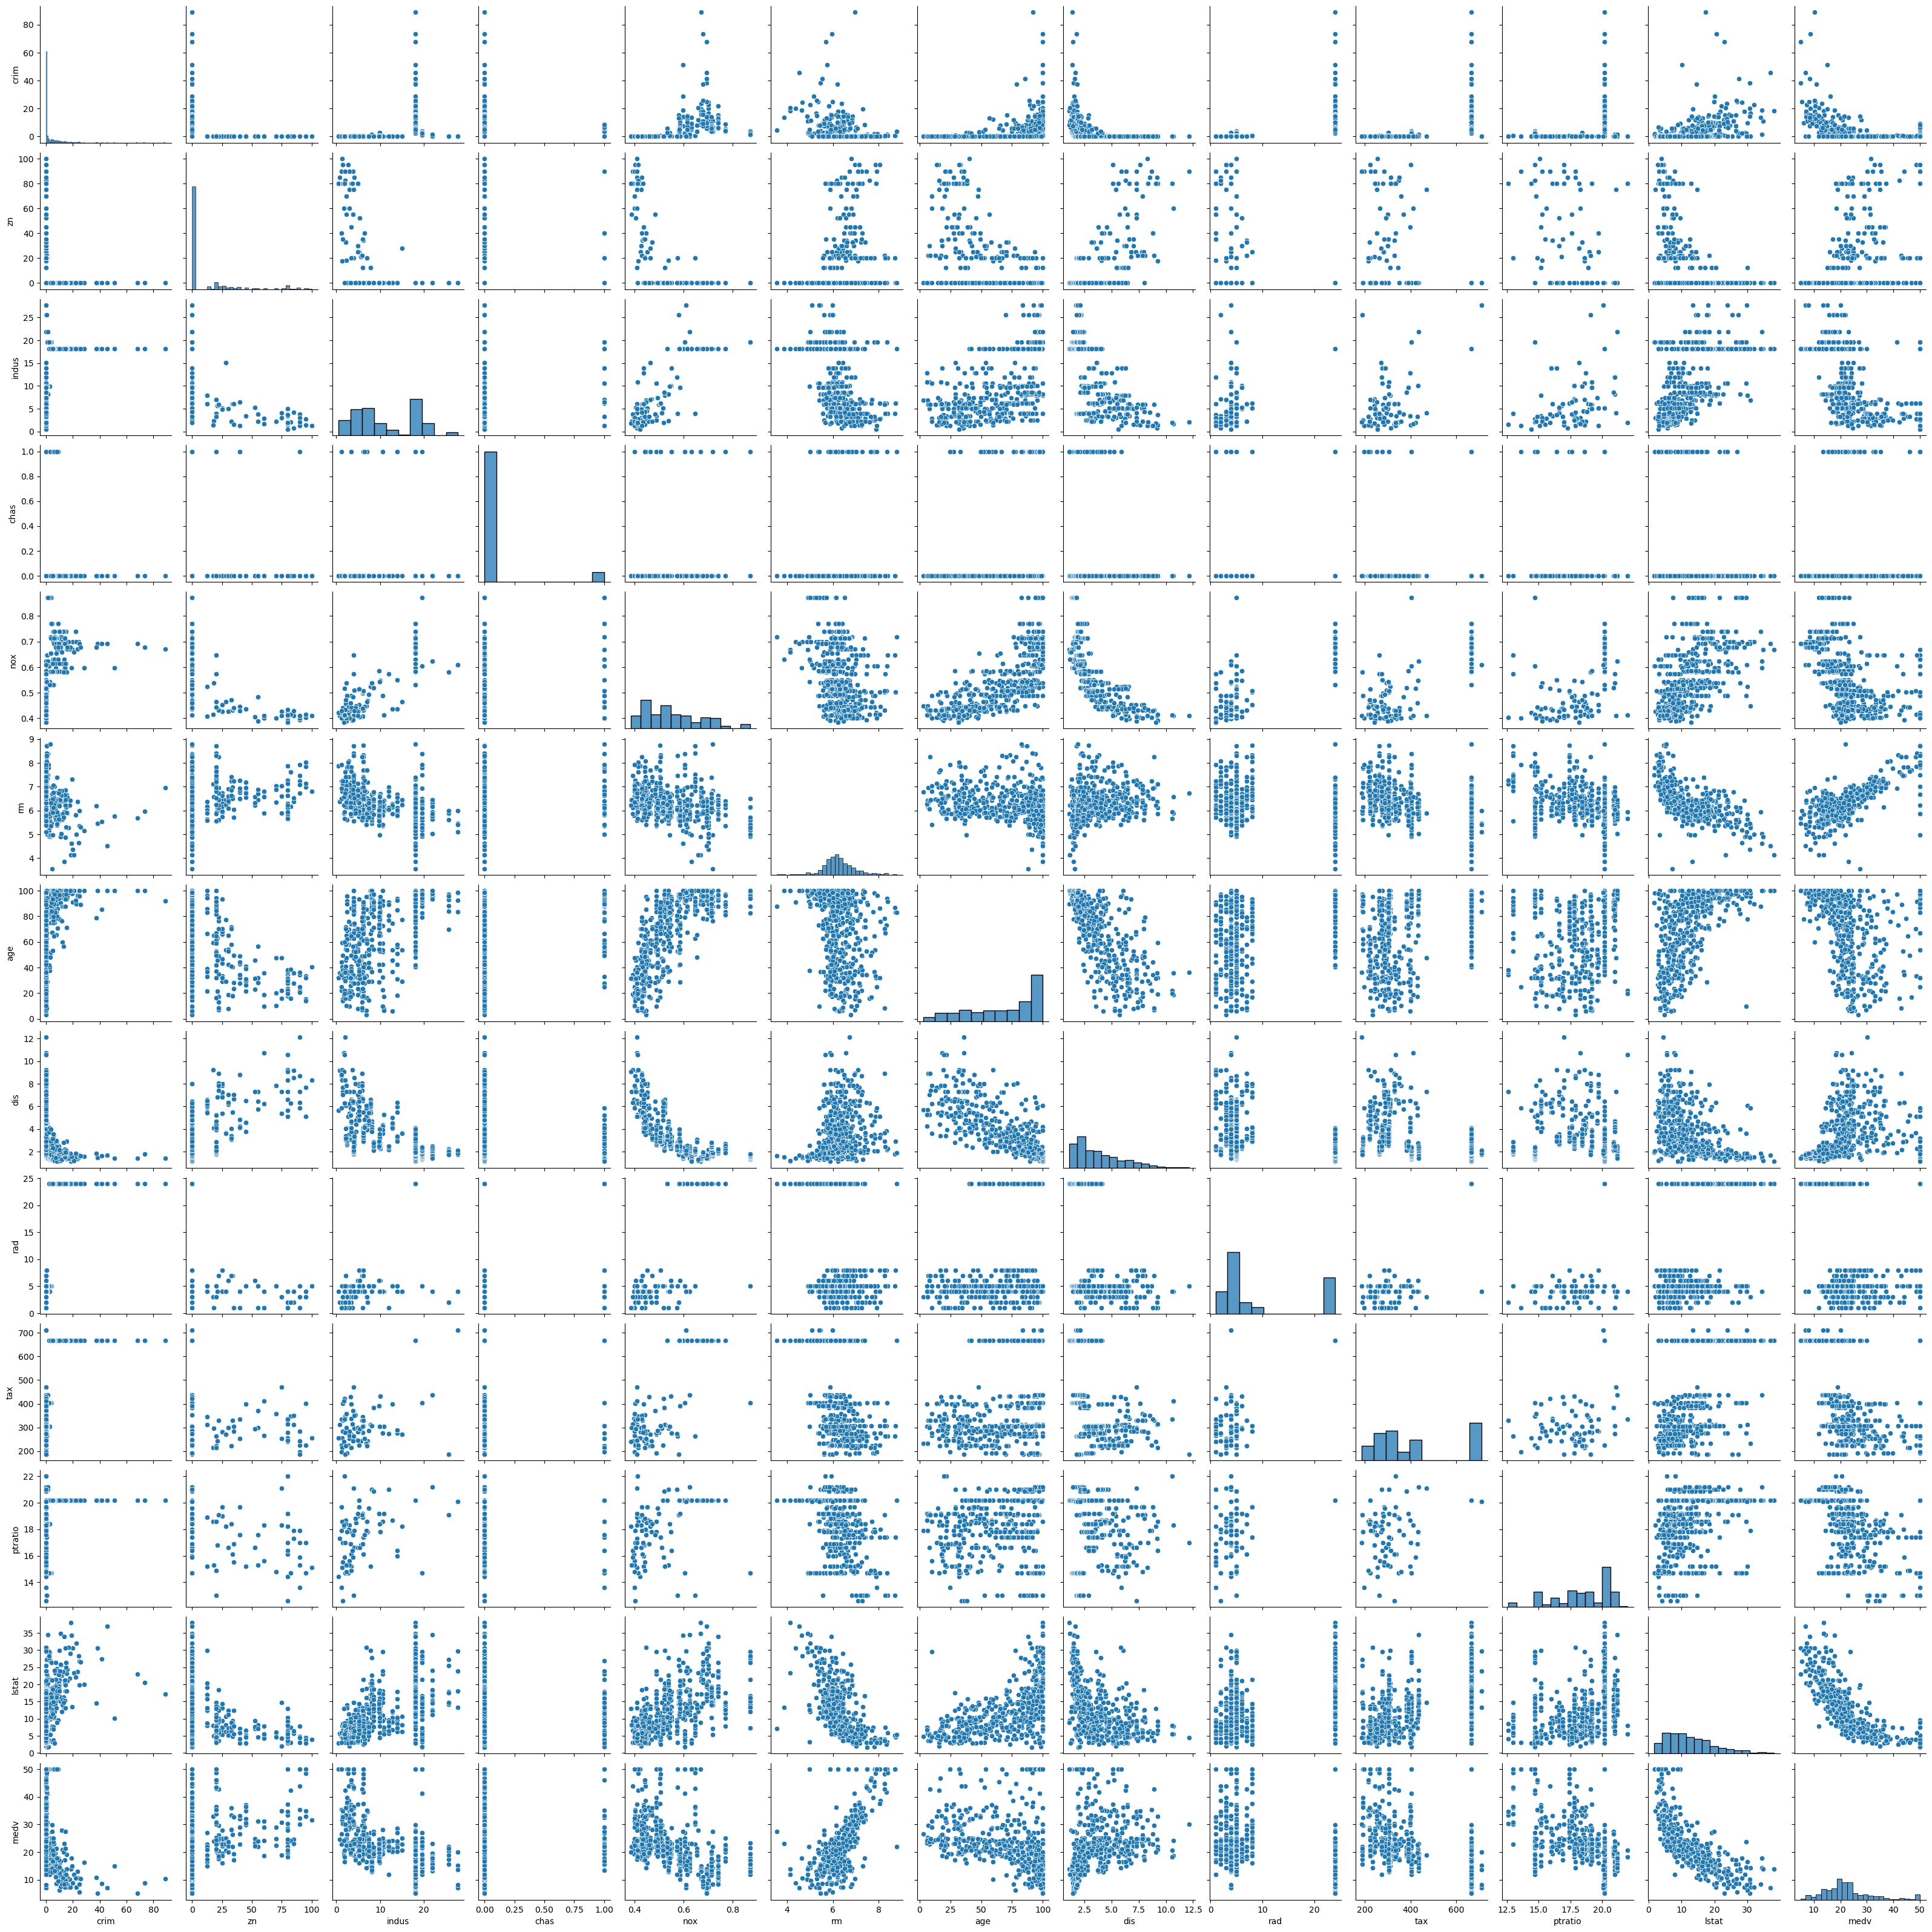

In [9]:
import seaborn as sns
sns.pairplot(boston_df)

<AxesSubplot:>

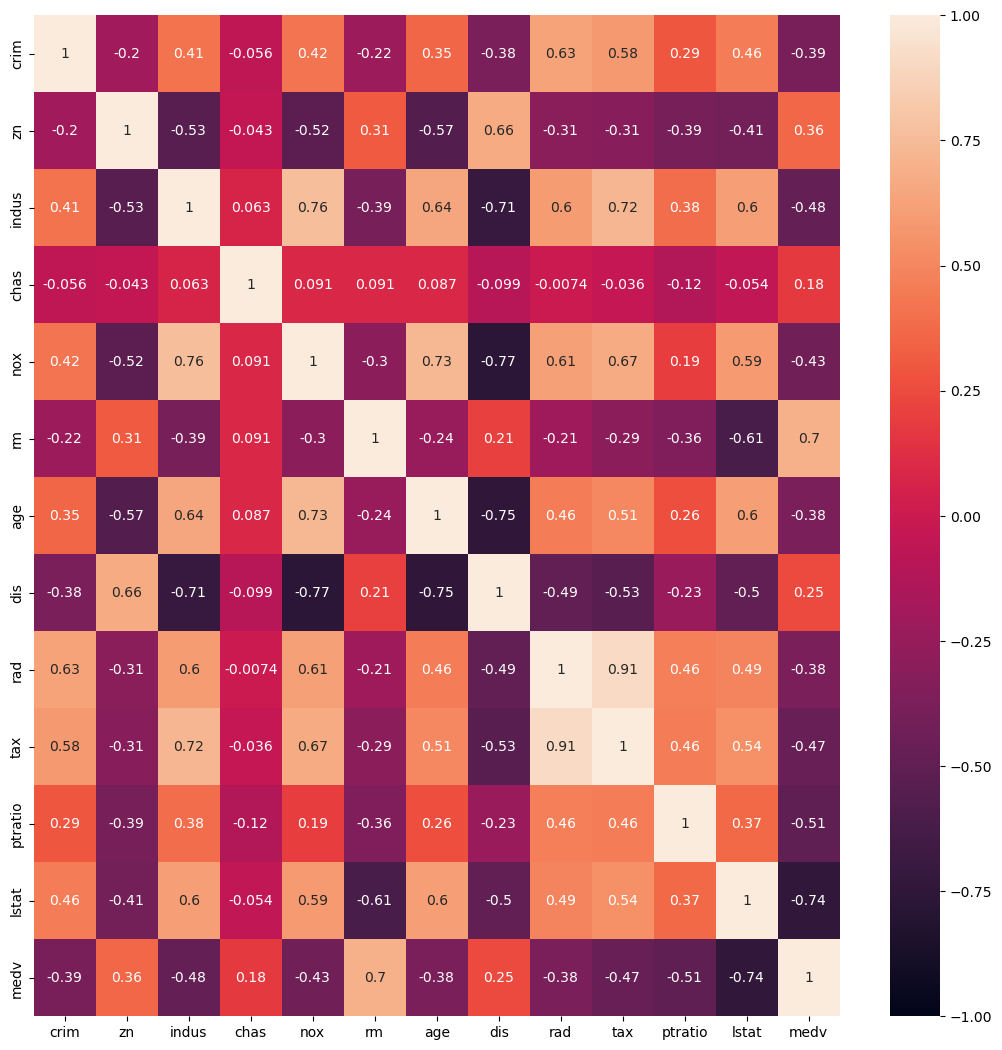

In [10]:

plt.figure(figsize=(13,13))
sns.heatmap(boston_df.corr(),vmin=-1,vmax=1,annot =True)

In [11]:
# independent and dependent features

X=boston_df.iloc[:,:-1]
Y=boston_df.iloc[:,-1]


In [12]:
X.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [13]:
Y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)



In [16]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
117,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,12.04
46,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21
17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58
469,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66
271,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,13.00
349,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,5.99
436,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,23.27


In [17]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
174,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04
275,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07
73,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
453,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
442,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,19.52
24,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,19.88
226,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63
434,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,16.22


In [18]:
## standardise the dataset

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [19]:
X_train_n=scalar.fit_transform(X_train)


In [20]:
X_test_n=scalar.transform(X_test)  

In [21]:
import pickle
pickle.dump(scalar,open('scalarmodel.pkl','wb'))
open('scalarmodel.pkl','wb').close

<function BufferedWriter.close>

In [22]:
X_train_n

array([[-0.41425879, -0.50512499, -1.29214218, ..., -1.11279004,
         0.18727079, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.15008778,
        -0.21208981, -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -1.0466393 ,
        -0.16771641, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.76399522,
        -0.56707702, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ..., -0.13857001,
         1.16348561, -0.25218837]])

In [23]:
X_test_n


array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.66777595,
        -0.74457062, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.92035152,
        -0.30083661, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  1.82791117,
         0.8084984 ,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.60162521,
        -0.38958342, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  0.56585078]])

##  Model Training

In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
regression =LinearRegression()

In [26]:
regression.fit(X_train_n,Y_train)

LinearRegression()

In [27]:
## print the coefficients 
print(regression.coef_)

[-1.16096196  0.81544469  0.25150446  0.90388642 -1.86406727  2.8008198
 -0.24506311 -2.94795852  1.89664169 -1.52987704 -2.00684723 -4.07422149]


In [28]:
## print the intercepts

print(regression.intercept_)

23.01581920903955


In [29]:
# on which parameter the model is trained

regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Prediction With Test Data

In [30]:
reg_pred=regression.predict(X_test_n)


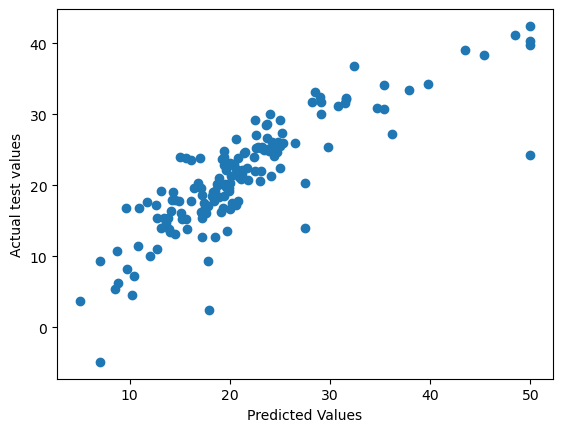

In [31]:
# plotting the scatter plot

plt.scatter(Y_test,reg_pred)
plt.ylabel("Actual test values")
plt.xlabel("Predicted Values")
plt.show()

In [32]:
residuals= Y_test-reg_pred 

In [33]:
residuals

174    -4.970948
275    -4.415495
492    -1.173427
73     -2.608792
453    -1.737099
         ...    
442     0.834959
24      1.315560
226    10.270386
434    -4.720224
448    -4.620123
Name: medv, Length: 152, dtype: float64

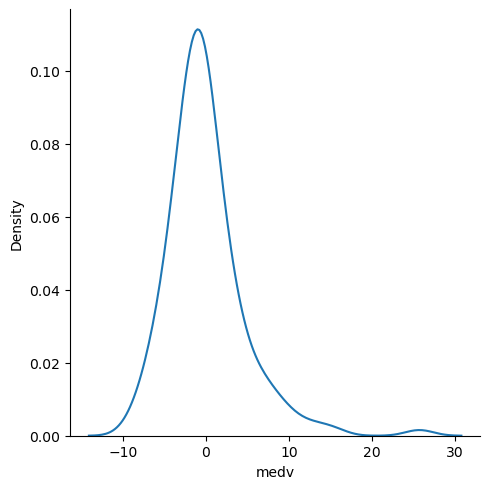

In [34]:
## plotting the residuals


sns.displot(residuals, kind='kde')
plt.show()

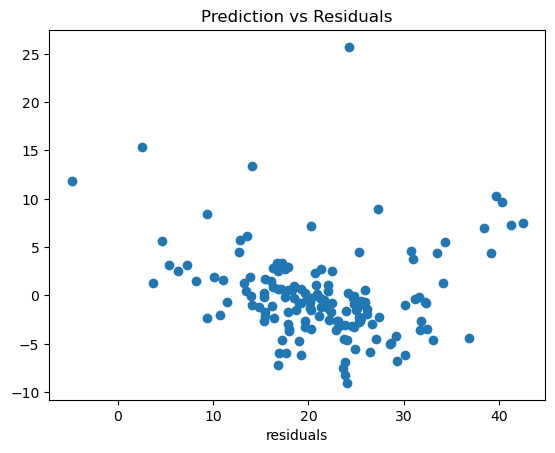

In [35]:
## scatter plot with respect to residual and prediction 

plt.scatter(reg_pred,residuals)
plt.xlabel("reg_pred")
plt.xlabel("residuals")
plt.title("Prediction vs Residuals")
plt.show()

In [36]:
# performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error  ",mean_absolute_error(Y_test,reg_pred))
print("mean_squared_error   ",mean_squared_error(Y_test,reg_pred))
print("square root of  mean_squared_error ",np.sqrt(mean_squared_error(Y_test,reg_pred)))

mean_absolute_error   3.1886622319426348
mean_squared_error    21.115450613869562
square root of  mean_squared_error  4.595155124026779


In [37]:
# R and adjusted square 

## R square  and adjusted R square 

# R^2 =1-SSR/SST

R^2 is coefficient of determination , SSR = Sum of square residuals, SST= total sum of square

In [38]:
from sklearn.metrics import r2_score
score= r2_score(Y_test,reg_pred)
print(score)  # the larger the score, the better

0.716620944909778


In [39]:
n=len(Y_test)
k=X_test.shape[1]

## Adjusted R2= 1-[(1-R2)*(n-1)/(n-k-1)]

where 

R2: The R2 of the model n: The number of observation k: The number of predictor variables

In [40]:
# display adjusted R -squared

print(" Adjusted R-squared value",   1-(    ((1-score)*(n-1) ) /    (n-k-1) )   )


 Adjusted R-squared value 0.6921565660530682


## New Data Prediction 

In [41]:
random_= 1  # taking one value to test 

prediction = regression.predict(scalar.transform(X_train_n[random_].reshape(1,-1)))
print(" y_test random",Y_test[random_])
print("prediction",prediction)

 y_test random 24.0
prediction [38.03661837]


c:\Users\sreeh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Pickling the Model for File Deployment

In [42]:
import pickle

In [43]:
pickle.dump(regression,open('regmodel.pkl','wb'))


In [44]:
#pickled_model=pickle.load(open('regmodel.pkl','rb')) 

In [45]:
#pickled_model.predict(scalar.transform(X_train_n[1].reshape(1,-1)))
